continuous model : 

a = 
-55.55556 

b = 
9308.42268 

c = 
1.0 


[[1.]]


<Figure size 640x480 with 0 Axes>

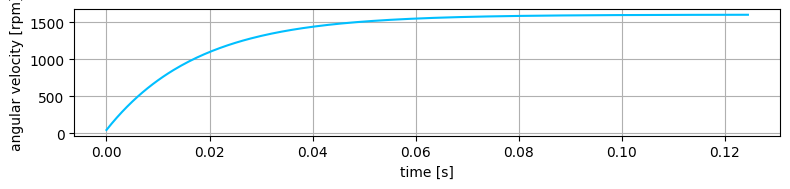

In [10]:
import LibsControl
import numpy
import matplotlib.pyplot as plt


i_max    = 1.0      #max RPM controll
rpm_free = 1600     #rpm on max current
tau      = 0.018    #18ms,  motor time constant



rad_free = (rpm_free/60.0)*(2.0*numpy.pi) #rpm to rad/s

#sampling frequency, 2000Hz
dt       = 1.0/2000.0


mat_a = numpy.zeros((1, 1))
mat_b = numpy.zeros((1, 1))
 
mat_a[0][0] = -1.0/tau    
mat_b[0][0] = (rad_free/i_max)*(1.0/tau)


ds   = LibsControl.DynamicalSystem(mat_a, mat_b, dt=dt)

print(str(ds))


steps = 250
t_result = numpy.arange(steps)*dt
#plot system open loop step response
u_result, x_result, y_result = ds.step_response(amplitude = [i_max], steps=steps)

y_result[:, 0]*= 60.0/(2.0*numpy.pi) #convert rad/s to rpm
LibsControl.plot_open_loop_response(t_result, y_result, "open_loop_response", labels=["angular velocity [rpm]"])



controller


k=
 [[0.02077239]] 

ki=
 [[3.16227766]] 






<Figure size 640x480 with 0 Axes>

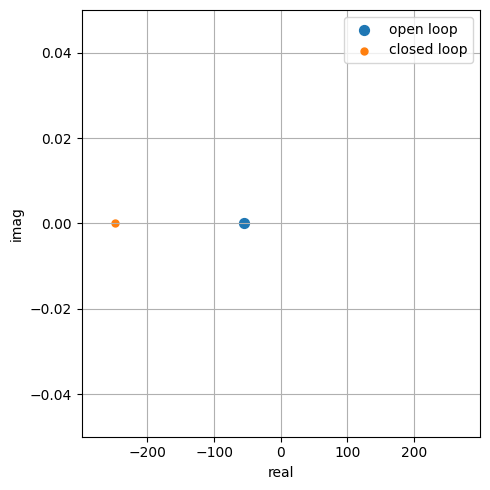

In [11]:
q = numpy.array([ [1.0] ] )
r = numpy.array( [ [0.1] ]) 

lqri = LibsControl.LQRISolver(ds.mat_a, ds.mat_b, ds.mat_c, q, r, dt)

k, ki    = lqri.solve()


#print solved controller matrices
print("controller\n\n")
print("k=\n", k, "\n")
print("ki=\n", ki, "\n")
print("\n\n")


#plot poles, both : open and closed loop
re_ol, im_ol, re_cl, im_cl = LibsControl.get_poles(ds.mat_a, ds.mat_b, k)
LibsControl.plot_poles(re_ol, im_ol, re_cl, im_cl, "poles.png")


<Figure size 640x480 with 0 Axes>

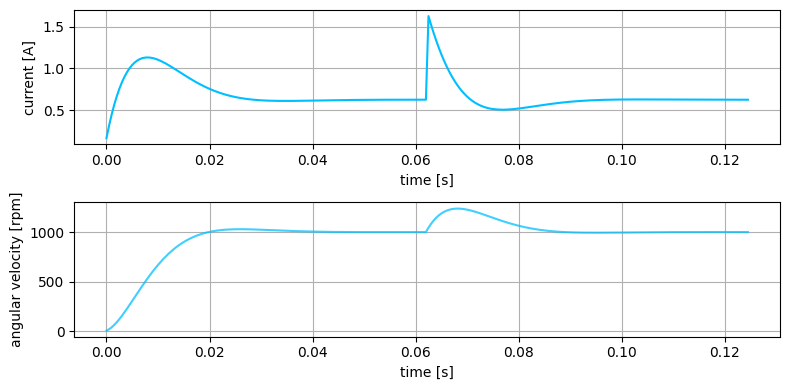

In [12]:
#required state, 1000rpm, comvert to rad/s
xr = numpy.array([[1000.0*2.0*numpy.pi/60.0]]).T

#step response
u_result, x_result, y_result, = lqri.closed_loop_response(xr, steps, disturbance = True)

x_result[:, 0]*= 60.0/(2.0*numpy.pi) #convert rad/s to rpm

LibsControl.plot_closed_loop_response(t_result, u_result, x_result, file_name = "closed_loop_response.png", u_labels = ["current [A]"], x_labels = ["angular velocity [rpm]"] )
